In [2]:
import pandas as pd

In [62]:
df = pd.read_csv("D:/Learning/Data Analytics Roadmap/Data Analysis using Python(Project)/supermarket_sales - Sheet1.csv")
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Task 1: What will be the best month for sales

#### Add Month Column

In [63]:
df['Month'] = df['Date'].str[0:1]
df['Month'] = df['Month'].astype('int32')

In [64]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


### checking for null values in the data

In [65]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month


In [66]:
df['Sales'] = df['Unit price'] * df['Quantity']
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,324.31
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,465.76
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,604.17


In [68]:
monthly_sales=df.groupby('Month').sum()['Sales']
monthly_sales.head()

Month
1    110754.16
2     92589.88
3    104243.34
Name: Sales, dtype: float64

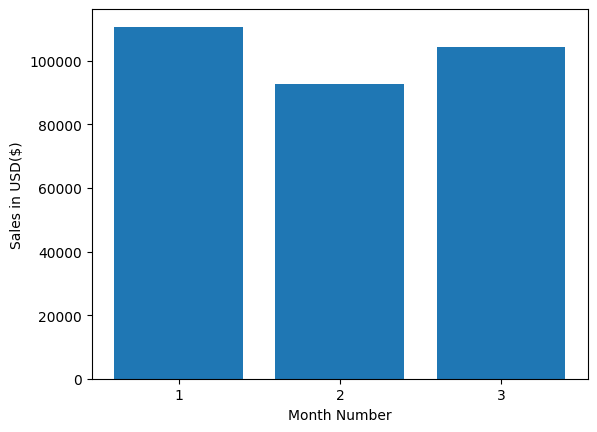

In [69]:
import matplotlib.pyplot as plt
months = range(1,4)
plt.bar(months, monthly_sales)
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD($)')
plt.show()

### Task 2: Which City sold most product

In [70]:
City_sales=df.groupby('City').sum()['Sales']
City_sales.head()

City
Mandalay     101140.64
Naypyitaw    105303.53
Yangon       101143.21
Name: Sales, dtype: float64

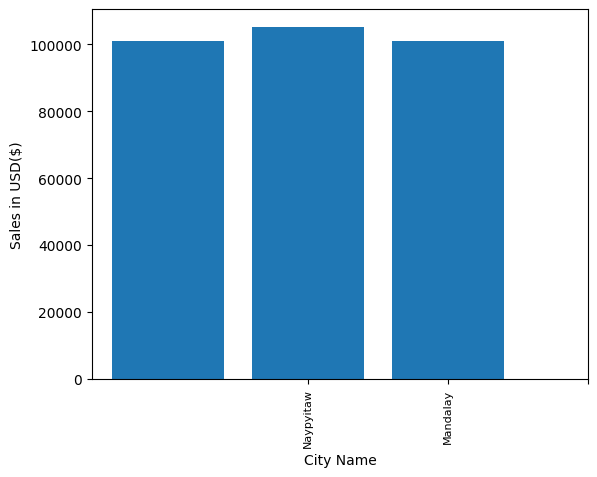

In [71]:
import matplotlib.pyplot as plt
cities = df['City'].unique()
plt.bar(cities, City_sales)
plt.xticks(Cities, rotation= 'vertical', size= 8)
plt.ylabel('Sales in USD($)')
plt.xlabel('City Name')
plt.show()

In [72]:
# Check the data type of a specific column
print(df.dtypes['Time'])


object


### Merging date and time column and make single column for date and time. 

In [73]:
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales,DateTime
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,522.83,2019-01-05 13:08:00
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,76.40,2019-03-08 10:29:00
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,324.31,2019-03-03 13:23:00
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,465.76,2019-01-27 20:33:00
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,604.17,2019-02-08 10:37:00


In [74]:
# Check the data type of a specific column
print(df.dtypes['Quantity'])

int64


### Task 3: What time should we display advertisement to maximize likelihood of customer's buying product?

In [75]:
df['Hour']= df['DateTime'].dt.hour
df['Minute']= df['DateTime'].dt.minute

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Month,Sales,DateTime,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,1,522.83,2019-01-05 13:08:00,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,3,76.40,2019-03-08 10:29:00,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,324.31,2019-03-03 13:23:00,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,1,465.76,2019-01-27 20:33:00,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,2,604.17,2019-02-08 10:37:00,10,37


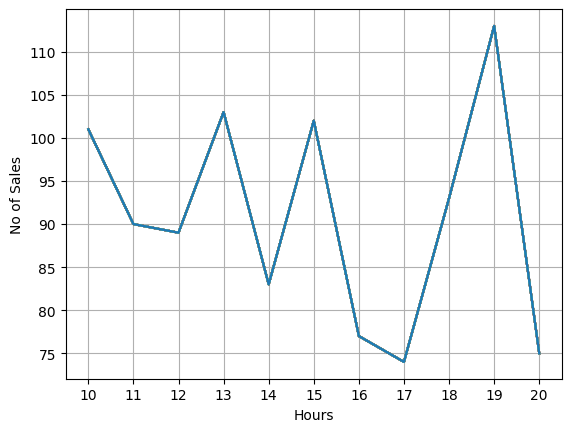

In [76]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('No of Sales')
plt.grid()
plt.show()

### Task4: Which product line sold the most

In [82]:
product_grouped = df.groupby('Product line')
#quantity_ordered = df.groupby('Product line')['Quantity'].sum()
quantity_orderd = product_grouped['Quantity'].sum()
quantity_orderd.head(10)


Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

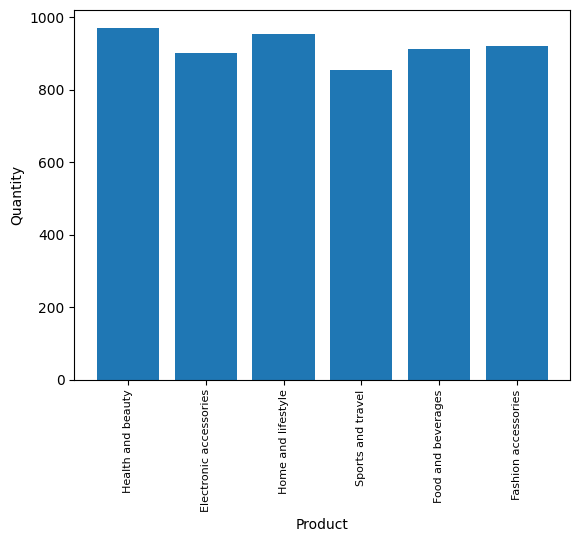

In [84]:
products = df['Product line'].unique()
plt.bar(products, quantity_orderd)
plt.xticks(products, rotation= 'vertical', size= 8)
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.show()